In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
#import tensorflow_hub as hub
import matplotlib.patches as patches

In [18]:
width = 320
height = 320

image_path = './only_cars/test/images/frame_0464.jpg'

img_org = cv2.imread(image_path)
img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)
img = cv2.resize(img_org, (width, height))
img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
img = img.astype(np.float32)

### TF Lite Interpreter

In [19]:
interpreter = tf.lite.Interpreter(model_path='ei-cars-v2-object-detection-tensorflow-lite-float32-model.lite')


In [20]:
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [23]:
interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()


In [24]:
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 70,
  'shape': array([ 1, 40, 40,  2]),
  'shape_signature': array([ 1, 40, 40,  2]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [25]:
output = interpreter.get_tensor(output_details[0]['index'])

# If the output type is int8 (quantized model), rescale data
output_type = output_details[0]['dtype']
if output_type == np.int8:
    output_scale, output_zero_point = output_details[0]['quantization']
    print("Raw output scores:", output)
    print("Output scale:", output_scale)
    print("Output zero point:", output_zero_point)
    print()
    output = output_scale * (output.astype(np.float32) - output_zero_point)

# Print the results of inference
print("Inference output:", output)

Inference output: [[[[1.0000000e+00 5.9354514e-11]
   [1.0000000e+00 1.9890400e-12]
   [1.0000000e+00 9.4692205e-12]
   ...
   [1.0000000e+00 1.0601316e-12]
   [1.0000000e+00 8.3328249e-12]
   [9.9999976e-01 2.2591682e-07]]

  [[1.0000000e+00 4.9972382e-10]
   [1.0000000e+00 1.6447670e-11]
   [1.0000000e+00 4.1962645e-11]
   ...
   [1.0000000e+00 9.0148835e-12]
   [1.0000000e+00 3.3744629e-11]
   [1.0000000e+00 1.4196185e-10]]

  [[1.0000000e+00 3.7349377e-09]
   [1.0000000e+00 4.8784943e-12]
   [1.0000000e+00 8.6118951e-12]
   ...
   [1.0000000e+00 5.2628709e-12]
   [1.0000000e+00 7.6139867e-12]
   [1.0000000e+00 2.6019339e-11]]

  ...

  [[9.9927968e-01 7.2039384e-04]
   [9.9992287e-01 7.7113014e-05]
   [9.9997544e-01 2.4592024e-05]
   ...
   [9.9998140e-01 1.8592234e-05]
   [9.9998069e-01 1.9316083e-05]
   [9.9999964e-01 3.0623616e-07]]

  [[9.9981529e-01 1.8474106e-04]
   [9.9999082e-01 9.2164537e-06]
   [9.9999774e-01 2.2503207e-06]
   ...
   [9.9999928e-01 7.0898727e-07]
   [9.99

In [33]:
type(output)

numpy.ndarray

In [4]:
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()

boxes = interpreter.get_tensor(output_details[0]['index'])
labels = interpreter.get_tensor(output_details[1]['index'])
scores = interpreter.get_tensor(output_details[2]['index'])
num = interpreter.get_tensor(output_details[3]['index'])

IndexError: list index out of range

In [44]:
labels

array([[ 2.,  2., 27.,  7.,  2.,  0.,  2., 27.,  2.,  2.,  2.,  7.,  2.,
         0.,  5.,  2.,  0.,  0.,  5.,  2.,  0., 12.,  2.,  2.,  2.]],
      dtype=float32)

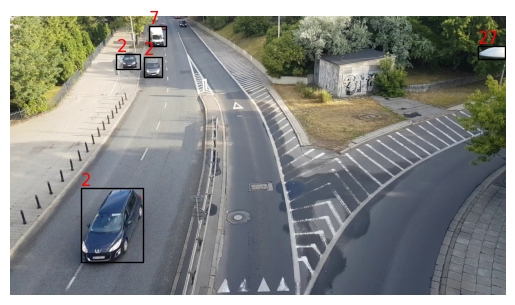

In [68]:
fig, ax = plt.subplots()
#img_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)
ax.imshow(img_org)
for i in range (boxes.shape[1]):
    if scores[0, i] > 0.2:
        box = boxes[0, i, :]
        x0 = int(box[1] * img_org.shape[1])
        y0 = int(box[0] * img_org.shape[0])
        x1 = int(box[3] * img_org.shape[1])
        y1 = int(box[2] * img_org.shape[0])

        rect = patches.Rectangle((x0, y0), (x1 - x0), (y1 - y0), fill=False)
        ax.add_patch(rect)
        ax.text(x0, (y0 - 10), str(int(labels[0, i])), fontsize=12, color='r')
ax.axis('off')
plt.show()

In [46]:
interpreter = tf.lite.Interpreter(model_path='1.tflite')

In [47]:
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [50]:
len(output_details)

4

### Extract metadata

In [51]:
from tflite_support import metadata as _metadata

displayer = _metadata.MetadataDisplayer.with_model_file('1.tflite')

In [52]:
displayer

In [53]:
json_file = displayer.get_metadata_json()

In [55]:
with open('metadata.json', "w") as f:
  f.write(json_file)

str

In [34]:
ei_model = tf.keras.models.load_model('model.h5')

In [36]:
ei_model

In [39]:
test_image = cv2.imread(image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (224,224))

In [42]:
result = ei_model.predict(np.expand_dims(test_image, axis=0))

1/1 [==============================] - 0s 42ms/step


In [43]:
print(result[0])

[[[1.0000000e+00 1.2021341e-13]
  [1.0000000e+00 1.8072536e-15]
  [1.0000000e+00 1.6582647e-15]
  ...
  [1.0000000e+00 1.2560619e-12]
  [1.0000000e+00 4.1679767e-12]
  [1.0000000e+00 3.1599776e-10]]

 [[1.0000000e+00 3.6814871e-14]
  [1.0000000e+00 3.5845086e-18]
  [1.0000000e+00 8.4247882e-18]
  ...
  [1.0000000e+00 2.2324034e-13]
  [1.0000000e+00 6.5107560e-14]
  [1.0000000e+00 3.8645065e-14]]

 [[1.0000000e+00 8.7760609e-15]
  [1.0000000e+00 1.0780438e-18]
  [1.0000000e+00 1.2641939e-18]
  ...
  [1.0000000e+00 8.8141836e-13]
  [1.0000000e+00 4.0601576e-12]
  [1.0000000e+00 6.5267092e-10]]

 ...

 [[9.9900037e-01 9.9961739e-04]
  [6.1752421e-01 3.8247585e-01]
  [8.1255317e-01 1.8744685e-01]
  ...
  [9.9658269e-01 3.4173308e-03]
  [9.9971122e-01 2.8881038e-04]
  [1.0000000e+00 4.1086352e-09]]

 [[9.9829394e-01 1.7061008e-03]
  [7.0192552e-01 2.9807442e-01]
  [9.9827242e-01 1.7276305e-03]
  ...
  [6.2042725e-01 3.7957275e-01]
  [9.9413931e-01 5.8606947e-03]
  [9.9999952e-01 4.2478655e-

In [45]:
result.shape

(1, 28, 28, 2)

In [50]:
result[0,0]

array([[1.0000000e+00, 1.2021341e-13],
       [1.0000000e+00, 1.8072536e-15],
       [1.0000000e+00, 1.6582647e-15],
       [1.0000000e+00, 1.7170497e-15],
       [1.0000000e+00, 1.4846461e-14],
       [1.0000000e+00, 2.4725185e-11],
       [1.0000000e+00, 3.6806332e-16],
       [1.0000000e+00, 2.4505631e-09],
       [9.9999952e-01, 4.6040191e-07],
       [9.9999833e-01, 1.6202696e-06],
       [9.9999988e-01, 6.4967324e-08],
       [9.9999976e-01, 2.4523086e-07],
       [1.0000000e+00, 6.2744927e-11],
       [1.0000000e+00, 2.2345493e-14],
       [1.0000000e+00, 5.5131277e-12],
       [1.0000000e+00, 7.3099263e-11],
       [1.0000000e+00, 8.1168897e-14],
       [1.0000000e+00, 6.0586244e-16],
       [1.0000000e+00, 1.7518076e-11],
       [1.0000000e+00, 4.4029168e-08],
       [1.0000000e+00, 3.8788961e-08],
       [1.0000000e+00, 2.7372087e-08],
       [1.0000000e+00, 1.2486140e-08],
       [1.0000000e+00, 1.9574566e-08],
       [1.0000000e+00, 1.5671335e-10],
       [1.0000000e+00, 1.

In [44]:
highest_prediction_score = max(result[0])
highest_prediction_score_index = 0
for i in range(len(image_test_result[0])):
    if image_test_result[0][i] == highest_prediction_score:
        highest_prediction_score_index = i

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()